# **Task 6: Linear Regression – House Price Prediction:**

## **Importing the required Libraries:**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score

## **Load the California Dataset and convert to Pandas Dataframe:**

In [59]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target   # target column

## **Basic Inspection Using head(),info(),describe():**

In [60]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [62]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## **Separating the Input features(X) and target variable(y):**

In [63]:
X = df.drop('Price', axis=1)
y = df['Price']

In [64]:
# Remove extreme target values
mask = y < 4.5   # remove capped houses
X_filtered = X[mask]
y_filtered = y[mask]


In [65]:
X_filtered

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [66]:
y_filtered

,Price
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


## **Splitting the dataset into training and testing sets with a fixed random_state:**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

In [68]:
X_train.shape, X_test.shape

((15476, 8), (3870, 8))

## **Training the Linear Regression Model and fit it using the data:**

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

## **Predict on test data and create comparison table showing actual vs predicted results:**

In [72]:
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10]
})

comparison

,Actual,Predicted
0,1.754,2.055426
1,3.594,2.725690
2,1.560,1.956112
3,1.348,0.765518
4,1.094,1.468328
5,0.750,1.357415
6,2.242,2.161034
7,2.333,2.632688
8,0.620,-0.064352
9,1.875,2.028872


## **Evaluate the model using MAE and RMSE to measure prediction error properly:**

In [73]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.45733709058726374
RMSE: 0.5968143043104993


## **Plot predicted vs actual values using scatter plot:**

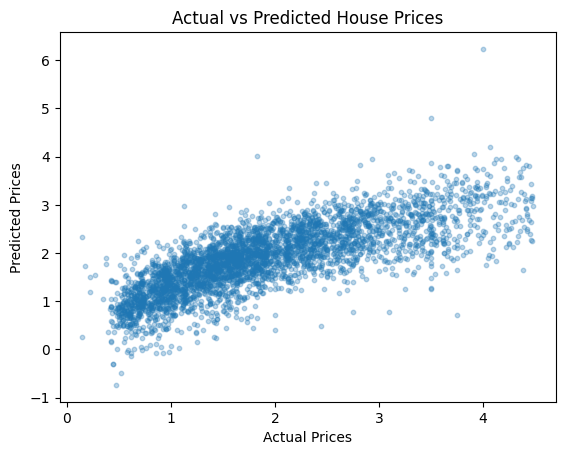

In [74]:
plt.scatter(y_test, y_pred,s=10, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

## **Interpret model coefficients to identify the most impactful features:**

In [75]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
3,AveBedrms,0.504156
0,MedInc,0.402676
1,HouseAge,0.006678
4,Population,0.000007
5,AveOccup,-0.002874
2,AveRooms,-0.090304
6,Latitude,-0.372349
7,Longitude,-0.387389
